In [1]:
import xarray as xr
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import geopandas as gpd
# from ftplib import FTP

In [2]:
import sys
print(sys.version)

3.12.0 | packaged by conda-forge | (main, Oct  3 2023, 08:26:13) [MSC v.1935 64 bit (AMD64)]


In [5]:
from cdo import *
cdo = Cdo(cdo='C:/cygwin64/bin/cdo.exe')
# cdo = Cdo()

# cdo.sellonlatbox('61,111,23,48', input='-remapbil,global_0.1 HAR_v2_d10km_m_2d_prcp_2004.nc', output='t.nc', options = '-P 8')

AttributeError: module 'signal' has no attribute 'siginterrupt'

In [2]:
# pathway = "historical"
# pathway = "ssp126"
pathway = "ssp370"
# pathway = "ssp585"

In [3]:
parameter = "pr"
label_parameter = "Precipitation"
unit = "kg m-2 s-1 "

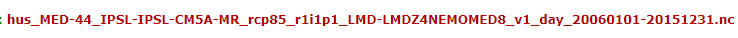

In [5]:

# data = xr.open_mfdataset(r'D:\thesis_data\tas_EUR-11_ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-CCLM4-8-17_v1_day_19890101-19901231.nc')
data = xr.open_mfdataset(r'C:\Users\suvam\Downloads\pr_EUR-11_ECMWF-ERAINT_evaluation_r1i1p1_CNRM-ALADIN63_v1_day_20160101-20181231.nc')


# If ISIMIP data
# data = xr.open_mfdataset(r'D:\thesis_data\%s\%s\mpi-esm1-2-hr_r1i1p1f1_w5e5_%s_%s_lat46.1to47.09lon10.28to12.33_daily_*_*.nc' %(pathway,parameter,pathway,parameter))

In [6]:
data.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:            (y: 453, x: 453, nvertex: 4, time: 1096, axis_nbounds: 2)
Coordinates:
  * time               (time) datetime64[ns] 2016-01-01T12:00:00 ... 2018-12-...
    lon                (y, x) float64 dask.array<chunksize=(453, 453), meta=np.ndarray>
    lat                (y, x) float64 dask.array<chunksize=(453, 453), meta=np.ndarray>
  * x                  (x) float64 0.0 12.5 25.0 ... 5.638e+03 5.65e+03
  * y                  (y) float64 0.0 12.5 25.0 ... 5.638e+03 5.65e+03
Dimensions without coordinates: nvertex, axis_nbounds
Data variables:
    bounds_nav_lon     (y, x, nvertex) float64 dask.array<chunksize=(453, 453, 4), meta=np.ndarray>
    bounds_nav_lat     (y, x, nvertex) float64 dask.array<chunksize=(453, 453, 4), meta=np.ndarray>
    time_bounds        (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1096, 2), meta=np.ndarray>
    pr                 (time, y, x) float32 dask.array<chunksize=(1096, 453, 4

In [7]:
data.attrs

{'description': 'Created by xios',
 'title': 'Created by xios',
 'Conventions': 'CF-1.6',
 'creation_date': '2018-11-16T13:30:33Z',
 'name': 'EUR-11_ECMWF-ERAINT_evaluation_r1i1p1_CNRM-ALADIN63_v1_day',
 'institute_id': 'CNRM',
 'institution': 'CNRM (Centre National de Recherches Meteorologiques, Toulouse 31057, France)',
 'model_id': 'CNRM-ALADIN63',
 'experiment_id': 'evaluation',
 'experiment': 'Evaluation run with reanalysis forcing',
 'contact': 'contact.aladin-cordex@meteo.fr',
 'product': 'output',
 'Convention': 'CF-1.6',
 'driving_model_id': 'ECMWF-ERAINT',
 'driving_model_ensemble_member': 'r1i1p1',
 'driving_experiment_name': 'evaluation',
 'driving_experiment': 'ERA-INTERIM, evaluation, r1i1p1',
 'rcm_version_id': 'v1',
 'project_id': 'CORDEX',
 'CORDEX_domain': 'EUR-11',
 'references': 'http://www.umr-cnrm.fr/spip.php?article125&lang=en',
 'comment': 'CORDEX Europe EUR-11 CNRM-ALADIN 6.3 L91 ECMWF-ERAINT: EUC12v63-1.100. Reference : Daniel M., Lemonsu A., Déqué M., Somot S

In [9]:
data["pr"]

<xarray.DataArray 'pr' (time: 1096, y: 453, x: 453)>
dask.array<open_dataset-cef0c99fbcbf91b81c863ddb416744depr, shape=(1096, 453, 453), dtype=float32, chunksize=(1096, 453, 453), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01T12:00:00 ... 2018-12-31T12:00:00
    lon      (y, x) float64 dask.array<chunksize=(453, 453), meta=np.ndarray>
    lat      (y, x) float64 dask.array<chunksize=(453, 453), meta=np.ndarray>
  * x        (x) float64 0.0 12.5 25.0 37.5 ... 5.625e+03 5.638e+03 5.65e+03
  * y        (y) float64 0.0 12.5 25.0 37.5 ... 5.625e+03 5.638e+03 5.65e+03
Attributes:
    standard_name:       precipitation_flux
    long_name:           Precipitation
    units:               kg m-2 s-1
    online_operation:    average
    interval_operation:  450 s
    interval_write:      1 d
    cell_methods:        time: mean
    grid_mapping:        Lambert_Conformal

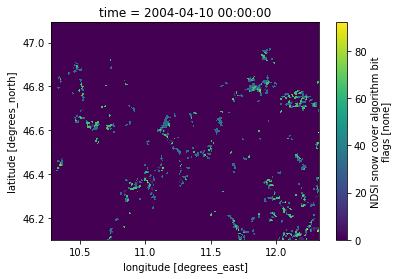

In [78]:
data["NDSI_Snow_Cover_Algorithm_Flags_QA"].isel(time=100).plot()

In [31]:
data["tas"].isel(time=1).values

array([[288.31854, 288.3466 , 288.35416, ..., 291.75958, 291.85782,
        291.97104],
       [287.99542, 287.97714, 287.99768, ..., 291.5427 , 291.64294,
        291.82355],
       [287.73438, 287.58978, 287.50345, ..., 291.3642 , 291.52963,
        291.73828],
       ...,
       [264.50568, 264.0502 , 264.13828, ..., 246.77142, 247.6606 ,
        246.88705],
       [264.2716 , 263.93625, 264.292  , ..., 238.75047, 247.07312,
        247.26779],
       [263.75436, 264.02277, 264.521  , ..., 238.6063 , 238.20093,
        246.94838]], dtype=float32)

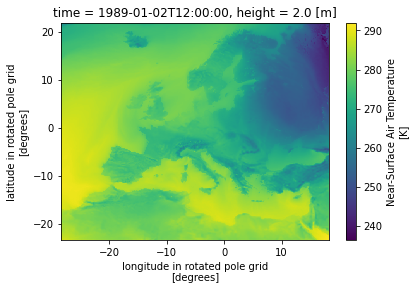

In [32]:
# import xarray as xr
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import geopandas as gpd
# from ftplib import FTP

# data = xr.open_mfdataset(r'D:\thesis_data\tas_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp26_r1i1p1_CNRM-ALADIN53_v1_day_20110101-20151231.nc')



# Plot the data
data = data["tas"].isel(time=1).plot()



In [7]:
data.attrs

{'CDI': 'Climate Data Interface version 1.6.8 (http://mpimet.mpg.de/cdi)',
 'Conventions': 'CF-1.4',
 'institution': 'Centre National de Recherches Meteorologiques',
 'experiment_id': 'rcp26',
 'experiment': 'RCP2.6 run with GCM forcing',
 'driving_model_ensemble_member': 'r1i1p1',
 'driving_experiment_name': 'rcp26',
 'institute_id': 'CNRM',
 'project_id': 'CORDEX',
 'CORDEX_domain': 'EUR-11',
 'product': 'output',
 'references': 'http://www.cnrm-game.fr/spip.php?rubrique69&lang=en',
 'creation_date': '2014-09-22 15:44:06',
 'CDO': 'Climate Data Operators version 1.6.8 (http://mpimet.mpg.de/cdo)',
 'rcm_version_id': 'v1',
 'comment': 'CORDEX Europe ALADIN5.3 0.5 deg CNRM-CERFACS-CNRM-CM5 L31: EUC12-5.00',
 'contact': 'contact.aladin-cordex@meteo.fr',
 'frequency': 'day',
 'driving_experiment': 'CNRM-CERFACS-CNRM-CM5, rcp26, r1i1p1',
 'driving_model_id': 'CNRM-CERFACS-CNRM-CM5',
 'model_id': 'ALADIN53'}

In [8]:
lats = time_array['lat'].where((time_array.lat>45) & (time_array.lon<47.2), drop=True)
lats

NameError: name 'time_array' is not defined

### For ALADIN one


In [11]:
data["tas"]

<xarray.DataArray 'tas' (time: 1826, y: 453, x: 453)>
dask.array<open_dataset-f54a2025ef7a8f61ff30b32b5b684bd6tas, shape=(1826, 453, 453), dtype=float32, chunksize=(1826, 453, 453), chunktype=numpy.ndarray>
Coordinates:
    lon      (y, x) float64 dask.array<chunksize=(453, 453), meta=np.ndarray>
    lat      (y, x) float64 dask.array<chunksize=(453, 453), meta=np.ndarray>
    height   float64 ...
  * time     (time) datetime64[ns] 2011-01-01T12:00:00 ... 2015-12-31T12:00:00
  * x        (x) float64 0.0 12.5 25.0 37.5 ... 5.625e+03 5.638e+03 5.65e+03
  * y        (y) float64 0.0 12.5 25.0 37.5 ... 5.625e+03 5.638e+03 5.65e+03
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          K
    grid_mapping:   Lambert_Conformal
    cell_methods:   time: mean

<ipython-input-28-f17f1c2904c6>:20: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(lons, lats, time_array, cmap=cmap, shading='auto')


NameError: name 'timestep' is not defined

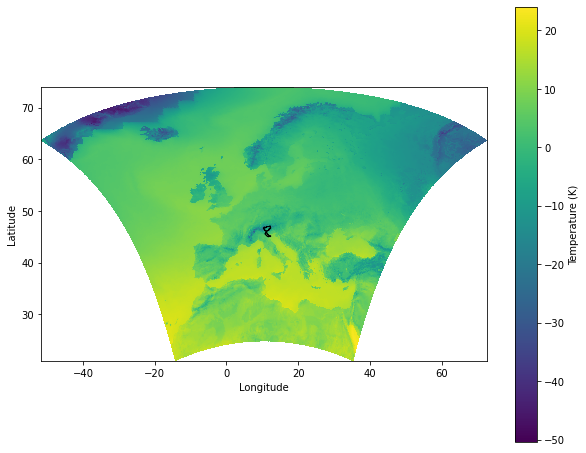

In [28]:
lat_min = 45  # Minimum latitude
lat_max = 47.2  # Maximum latitude
lon_min = 10  # Minimum longitude
lon_max = 12.33  # Maximum longitude

time_array = data["tas"].isel(time=-1)
# time_array = data["tas"].isel(height=0, time=-1).plot()
# time_array = time_array.where((time_array.lon>10) & (time_array.lon<12.33) & (time_array.lat>45) & (time_array.lon<47.2), drop=True)

# lats = time_array['lat'].where((time_array.lat>45) & (time_array.lon<47.2), drop=True)
# lons = time_array['lon'].where((time_array.lon>10) & (time_array.lon<12.33), drop=True)

lats = time_array['lat']
lons = time_array['lon']


# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
cmap = plt.get_cmap('viridis')
im = ax.pcolormesh(lons, lats, time_array, cmap=cmap, shading='auto')
plt.colorbar(im, ax=ax, label='Temperature (K)')

shapefile_data = gpd.read_file(r'C:\Users\suvam\AiE stuff\thesis\adigeshp\Export_Output2.shp')
shapefile_data.plot(ax=ax, color='none', edgecolor='black')

# Set labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Temperature at Timestep {timestep} (Subset)')

# Show the plot
plt.show()

### For TA where lat and lon are dimensions

In [6]:
subset_data

<xarray.Dataset>
Dimensions:    (time: 3650, bnds: 2, lat: 8, lon: 7)
Coordinates:
  * time       (time) object 2006-01-01 12:00:00 ... 2015-12-31 12:00:00
  * lat        (lat) float64 45.09 45.39 45.69 45.99 46.29 46.59 46.89 47.19
  * lon        (lon) float64 10.24 10.59 10.93 11.28 11.62 11.97 12.32
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(3650, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(8, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(3650, 8, 7), meta=np.ndarray>
Attributes: (12/26)
    institution:            IPSL (Institut Pierre Simon Laplace, Paris, France)
    institute_id:           IPSL
    experiment_id:          IPSL-IPSL-CM5A-MR_rcp85
    source:                 IPSL-CM4-V2 : LMDZ4 ORCHIDEE
    model_id:               LMD-LMDZ4NEMOMED8_v1
    forcing:                Nat, Ant, GHG, SA
    ...                     ...
    table_id:               Table day (October 2013) f19c618ad770d4fc2b5d41e3...
    title:                  LMD-LMDZ4NEMOMED8_v1 model output prepared for Me...
    parent_experiment:      IPSL-CM5A-MR_rcp85
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.8.2

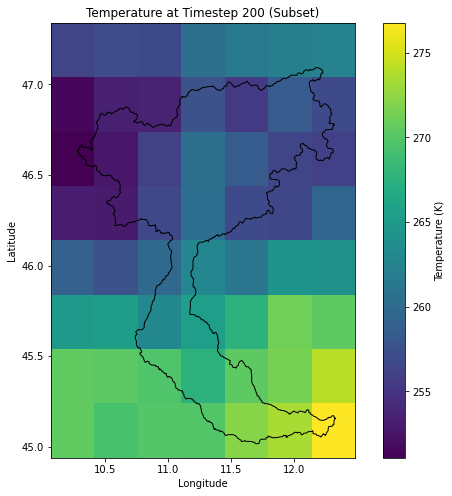

In [7]:
timestep = 200

# Define the latitude and longitude bounds for your region of interest
lat_min = 45  # Minimum latitude
lat_max = 47.2  # Maximum latitude
lon_min = 10  # Minimum longitude
lon_max = 12.33  # Maximum longitude

# Select the subset of data within the specified bounds
subset_data = data.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Extract temperature data for the chosen timestep
temperature = subset_data['tas'].isel(time=1)

# Get latitude and longitude values
lats = subset_data['lat']
lons = subset_data['lon']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
cmap = plt.get_cmap('viridis')
im = ax.pcolormesh(lons, lats, temperature, cmap=cmap, shading='auto')
plt.colorbar(im, ax=ax, label='Temperature (K)')

shapefile_data = gpd.read_file(r'C:\Users\suvam\AiE stuff\thesis\adigeshp\Export_Output2.shp')
shapefile_data.plot(ax=ax, color='none', edgecolor='black')

# Set labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Temperature at Timestep {timestep} (Subset)')

# Show the plot
plt.show()


In [67]:
data.attrs

{'CDI': 'Climate Data Interface version 1.5.9 (http://code.zmaw.de/projects/cdi)',
 'institution': 'Climate Limited-area Modelling Community (CLM-Community)',
 'title': 'COSMO_CLM_4.8 simulation (0.44 Deg) with MPI-ESM-LR historical r1i1p1 forcing',
 'project_id': 'CORDEX',
 'experiment_id': 'r1i1p1',
 'realization': 1,
 'conventionsURL': 'http://www.unidata.ucar.edu/packages/netcdf/conventions.html',
 'contact': 'kothe@iau.uni-frankfurt.de',
 'references': 'http//www.clm-community.eu, http://www.geo.uni-frankfurt.de/iau/meso/',
 'creation_date': '2013-09-10 18:27:20',
 'NCO': '4.0.5',
 'experiment': 'Evaluation run with reanalysis forcing',
 'driving_experiment': 'MPI-ESM-LR,historical,r1i1p1',
 'driving_model_id': 'MPI-ESM-LR',
 'driving_model_ensemble_member': 'r1i1p1',
 'driving_experiment_name': 'historical',
 'frequency': 'day',
 'institute_id': 'GUF',
 'model_id': 'GUF-CCLM4-8-18',
 'rcm_version_id': 'v1',
 'CORDEX_domain': 'MED-44',
 'product': 'output',
 'CDO': 'Climate Data O

In [66]:
data["rlat"]

AttributeError: 'DataArray' object has no attribute 'info'

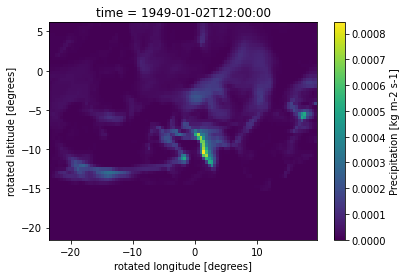

In [62]:
# For the new data from Hamburg university \pr_MED-44_MPI-ESM-LR_historical_r1i1p1_GUF-CCLM4-8-18_v1_day_19490101-19501231.nc
timestep = 200

# Define the latitude and longitude bounds for your region of interest
lat_min = 45  # Minimum latitude
lat_max = 47.2  # Maximum latitude
lon_min = 10  # Minimum longitude
lon_max = 12.33  # Maximum longitude

# Select the subset of data within the specified bounds
# subset_data = data.sel(rlat=slice(lat_min, lat_max), rlon=slice(lon_min, lon_max))

# Extract temperature data for the chosen timestep
# temperature = data['pr'].isel(time=1).sel(rlat=slice(lat_min, lat_max), rlon=slice(lon_min, lon_max)).plot()
temperature = data['pr'].isel(time=1).plot()
# # Get latitude and longitude values
# lats = subset_data['rlat']
# lons = subset_data['rlon']

# # Create the plot
# fig, ax = plt.subplots(figsize=(10, 8))
# cmap = plt.get_cmap('viridis')
# im = ax.pcolormesh(lons, lats, temperature, cmap=cmap, shading='auto')
# plt.colorbar(im, ax=ax, label='Temperature (K)')

# shapefile_data = gpd.read_file(r'C:\Users\suvam\AiE stuff\thesis\adigeshp\Export_Output2.shp')
# shapefile_data.plot(ax=ax, color='none', edgecolor='black')

# # Set labels
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')
# ax.set_title(f'Temperature at Timestep {timestep} (Subset)')

# # Show the plot
# plt.show()


In [33]:
temp = data['tas']
print(temp)
# print(temp.values.shape)
# print(temp.values)

KeyError: 'tas'

In [34]:
da = xr.DataArray(
    np.arange(25).reshape(5, 5),
    coords={"x": np.arange(5), "y": np.arange(5)},
    dims=("x", "y"),)

da

<xarray.DataArray (x: 5, y: 5)>
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])
Coordinates:
  * x        (x) int32 0 1 2 3 4
  * y        (y) int32 0 1 2 3 4

In [35]:

# Define the date, longitude, and latitude you're interested in
desired_date = '1950-01-20'
desired_lon = 10
desired_lat = 47

# Select the data for the desired date
temperature = data['tas'].sel(time=desired_date, lat=(1,1))
temperature

KeyError: 'tas'

In [36]:

# Find the nearest indices for the desired longitude and latitude
lon_idx = (temperature['lon'] - desired_lon).argmin().item()
lat_idx = (temperature['lat'] - desired_lat).argmin().item()

# Extract the temperature value
temperature_value = temperature[0, 0, lat_idx, lon_idx].item()

print(f"The temperature value on {desired_date} at longitude {desired_lon} and latitude {desired_lat} is {temperature_value} K.")


IndexError: too many indices

In [37]:

# Assuming 'data' is the xarray dataset containing your NetCDF data
# Replace 'path_to_your_data.nc' with the actual path if necessary
# Example: data = xr.open_dataset('path_to_your_data.nc')

# Assuming you want to visualize the first timestep
timestep = 0

# Extract temperature data for the chosen timestep
temperature = data['ta'][timestep, 0, :, :]

# Get latitude and longitude values
lats = data['lat']
lons = data['lon']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
cmap = plt.get_cmap('viridis')
im = ax.pcolormesh(lons, lats, temperature, cmap=cmap, shading='auto')
plt.colorbar(im, ax=ax, label='Temperature (K)')

shapefile_data = gpd.read_file(r'C:\Users\suvam\AiE stuff\thesis\adigeshp\Export_Output2.shp')
shapefile_data.plot(ax=ax, color='none', edgecolor='black')

# Set labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'Temperature at Timestep {timestep}')

# Show the plot
plt.show()


KeyError: 'ta'

In [38]:
parameter = "ta"
DS.values


<bound method Mapping.values of <xarray.Dataset>
Dimensions:  (lat: 2, lon: 4, time: 31411)
Coordinates:
  * lat      (lat) float64 46.75 46.25
  * lon      (lon) float64 10.75 11.25 11.75 12.25
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(2192, 2, 4), meta=np.ndarray>
Attributes:
    title:        ISIMIP3b bias-adjusted climate input data
    institution:  Potsdam Institute for Climate Impact Research (PIK)
    project:      Inter-Sectoral Impact Model Intercomparison Project phase 3...
    contact:      ISIMIP cross-sectoral science team <info@isimip.org> <https...
    summary:      CMIP6 daily output data bias-adjusted and statistically dow...
    references:   Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> and...>

In [39]:
parameter = "ta"
data = DS
# Select time step to plot (e.g., the first time step)
timestep = 20

# Extract variable of interest (e.g., 'temperature')
varname = parameter
var = data[varname][timestep, :, :]
lons = data['lon'].values
lats = data['lat'].values


print(var.shape)

KeyError: 'ta'

NameError: name 'var' is not defined

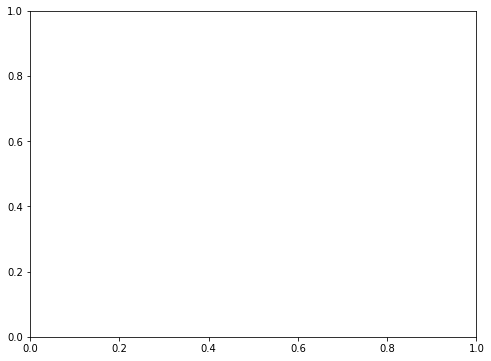

In [40]:

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))
cmap = plt.get_cmap('jet')
im = ax.pcolormesh(lons, lats, var.T, cmap=cmap, shading = "nearest")
plt.colorbar(im, ax=ax)

# Add shapefile to plot
shapefile_path = 'path/to/shapefile.shp'
shapefile_data = gpd.read_file(r'C:\Users\suvam\AiE stuff\thesis\adigeshp\Export_Output2.shp')
shapefile_data.plot(ax=ax, color='none', edgecolor='black')

# Add title and axis labels
ax.set_title('{} at time step {}'.format(varname, timestep))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show plot
plt.show()

In [41]:
DS.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:  (lat: 2, lon: 4, time: 31411)
Coordinates:
  * lat      (lat) float64 46.75 46.25
  * lon      (lon) float64 10.75 11.25 11.75 12.25
  * time     (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
Data variables:
    pr       (time, lat, lon) float32 dask.array<chunksize=(2192, 2, 4), meta=np.ndarray>
Attributes:
    title:        ISIMIP3b bias-adjusted climate input data
    institution:  Potsdam Institute for Climate Impact Research (PIK)
    project:      Inter-Sectoral Impact Model Intercomparison Project phase 3...
    contact:      ISIMIP cross-sectoral science team <info@isimip.org> <https...
    summary:      CMIP6 daily output data bias-adjusted and statistically dow...
    references:   Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> and...>

In [42]:
parameter = "snw"
DS[parameter]

KeyError: 'snw'

In [43]:
attributes = DS[parameter].attrs
label_parameter =  attributes["long_name"]
unit = attributes["units"]

print("label parameter: ", label_parameter)
print("unit: ",unit)

KeyError: 'snw'

In [44]:
# Resample data to weekly frequency
DS_weekly = DS[parameter].resample(time='1W').mean()

# Spatially average tas
DS_spatial_avg = DS_weekly.mean(dim=['lat', 'lon'])


KeyError: 'snw'

In [45]:
DS_spatial_avg

NameError: name 'DS_spatial_avg' is not defined

In [46]:
# Convert xarray data to pandas DataFrame
df = DS_spatial_avg.to_dataframe()

NameError: name 'DS_spatial_avg' is not defined

In [47]:
# Rename column
df = df.rename(columns={parameter: label_parameter})

# Print DataFrame
df

NameError: name 'df' is not defined

In [48]:
ax = df.plot(y=label_parameter, figsize=(12, 6))

# Set y-axis label
ax.set_ylabel('%s (%s)' %(label_parameter, unit))

# Set title
ax.set_title(pathway)

# Show plot
plt.show()

NameError: name 'df' is not defined